<a href="https://colab.research.google.com/github/karthikeyan0741/AI-ML-2024-BATCH-1/blob/main/lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-NEAREST NEIGHBOUR CLASSIFICATION USING CLASSIFIED MAUFACTURING DATASET

Part 1 – Import the required Python, Pandas, Matplotlib, Seaborn packages

In [5]:
import matplotlib.pyplot as mt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

Reading data from the file

In [7]:
d=pd.read_table("/Classified_Data.txt",sep=',',index_col=0)
d.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
d.info(verbose=True)#to get info of the table


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [9]:
d.describe(percentiles=[.25,.5,.75,.9])
d

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [10]:
d.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

identify the target classes from the dataset and their counts

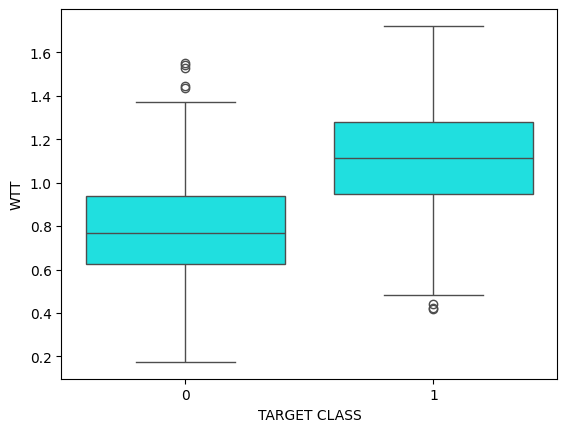

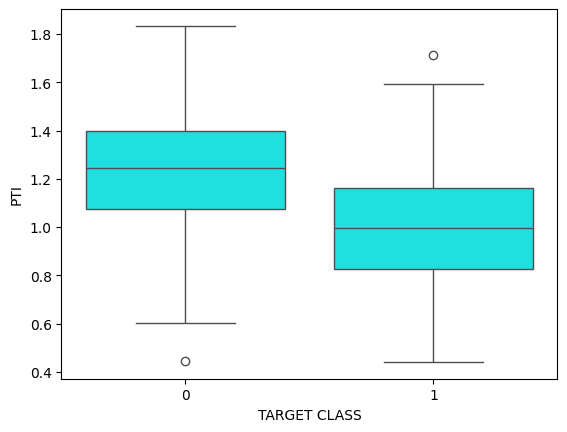

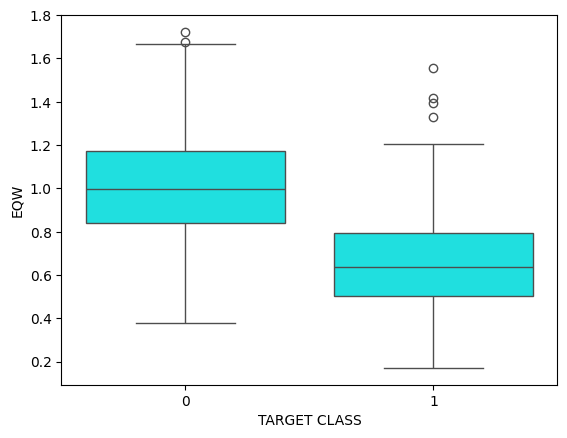

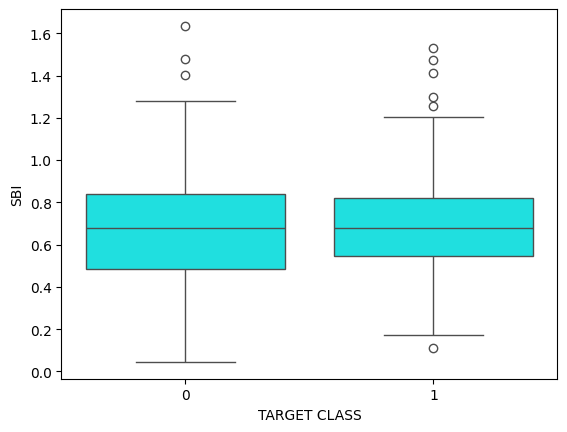

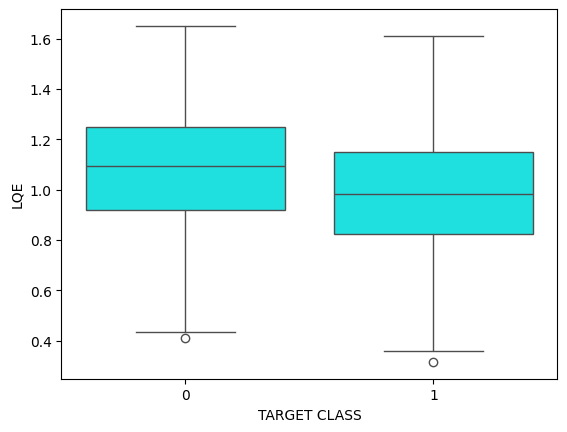

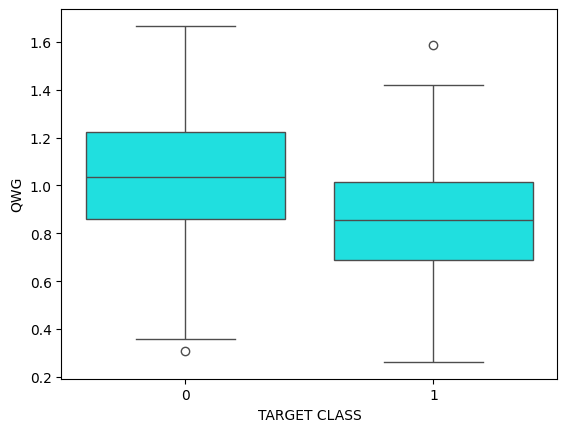

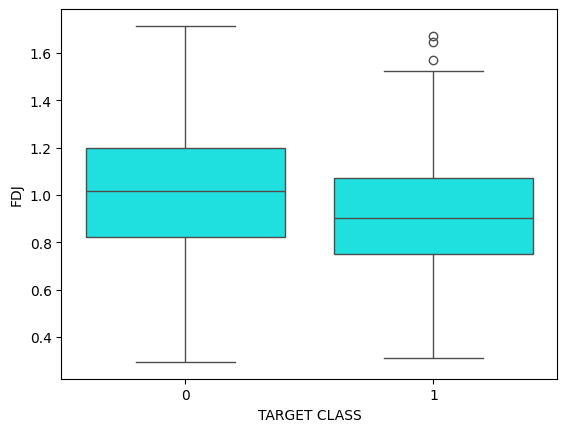

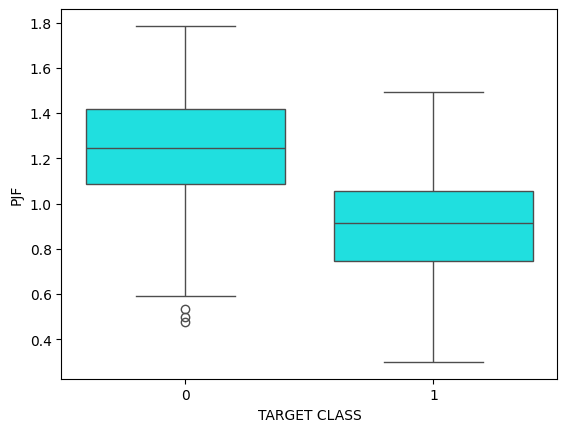

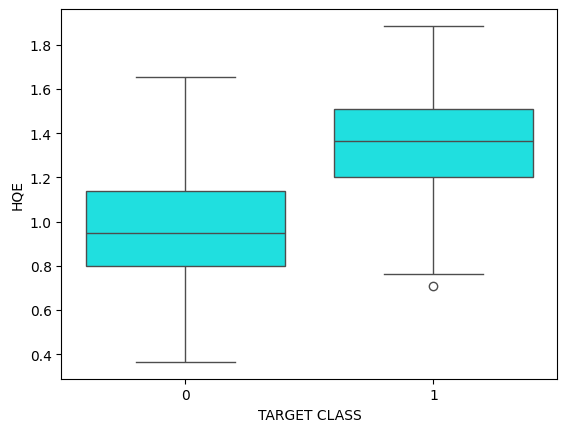

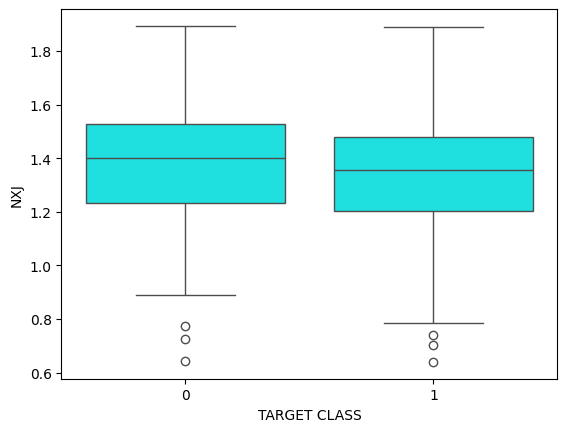

<Figure size 640x480 with 0 Axes>

In [11]:
l=list(d.columns)
l[0:len(l)-2]
for i in range(len(l)-1):
  sns.boxplot(x='TARGET CLASS',y=l[i],data =d,color='cyan')
  mt.figure()

scale the features using preprocessor package

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


fitting features data only to this estimator(leaving the target class column and transform)


In [13]:
scaler.fit(d.drop('TARGET CLASS',axis=1))
scaled_features=scaler.transform(d.drop('TARGET CLASS',axis=1))


In [14]:
d_feat=pd.DataFrame(scaled_features,columns=d.columns[:-1])
d_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


##Part 2 – Model training and Fit the data to Model

TRAIN/TEST SPLIT =,MODAL FIT AND PREDICTION

In [15]:
from sklearn.model_selection import train_test_split
X=d_feat
y=d['TARGET CLASS']
X_train,X_test,y_train,y_test=train_test_split(scaled_features,d['TARGET CLASS'],test_size=0.30,random_state=101)



In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

##Part 3 – Evaluate the Classification Quality

In [17]:
pred=knn.predict(X_test)


In [18]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[151   8]
 [ 15 126]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [20]:
print("MISCLASSFICATION ERROR RATE",round(np.mean(pred!=y_test),3))

MISCLASSFICATION ERROR RATE 0.077


k elbow method

In [21]:

error_rate=[]
for i in range(1,60):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclasification) Rate')

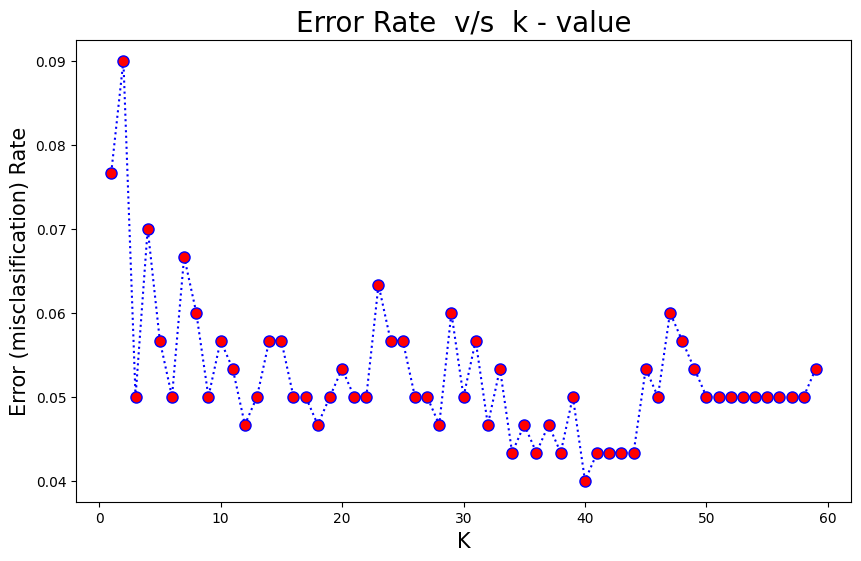

In [22]:
mt.figure(figsize=(10,6))
mt.plot(range(1,60),error_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
mt.title('Error Rate  v/s  k - value',fontsize=20)
mt.xlabel('K',fontsize=15)
mt.ylabel('Error (misclasification) Rate',fontsize=15)